In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(28,28,1))
print input_img.shape[:]
x=Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
print x.shape[0:]
x=MaxPooling2D((2,2),padding='same')(x)
#print x.shape[0:]
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
#print x.shape[0:]
x=MaxPooling2D((2,2),padding='same')(x)
#print x.shape[0:]
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#print x.shape[0:]
encoded = MaxPooling2D((2, 2), padding='same')(x)
print encoded.shape[0:]
### Decoding 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
print x.shape[0:]
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print decoded.shape[0:]


#autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
#x=Conv2D(1,(3,3),activation='relu',padding='same')(x)
#x=UpSampling2D((2,2),padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#decoded = UpSampling2D((2, 2), padding='same')(x)

Using TensorFlow backend.


(?, 28, 28, 1)
(?, 28, 28, 16)
(?, 4, 4, 8)
(?, 14, 14, 16)
(?, 28, 28, 1)


In [28]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder=Model(input_img, encoded)
L=len(autoencoder.layers)
#decoded_input1=Input(shape=(32,))
#decoder1=autoencoder.layers[L-3]
#decoder2=autoencoder.layers[L-2]
#decoder3=autoencoder.layers[L-1]
#decoder=Model(decoded_input1, decoder3(decoder2(decoder1(decoded_input1))))
#decoder_layer1=autoencoder.layers[L-1]
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#decoder=Model(encoded_input1,decoder_layer1(encoded_input1))
#encoded_input2=Input(shape=(64,))
#decoder_layer2=autoencoder.layers[L-2]
#decoder2=Model(decoder1,decoder_layer2(decoder1))

In [29]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [30]:
from keras.datasets import mnist 
(x_trainO,_),(x_testO,_)=mnist.load_data()
import numpy as np

In [31]:
x_test=x_testO.reshape(len(x_testO),28,28,1)
x_train=x_trainO.reshape(len(x_trainO),28,28,1)
#x_test[1]

In [32]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
print x_test.shape
print x_train.shape

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [34]:
from keras.callbacks import TensorBoard
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 65s - loss: 0.1406 - val_loss: 0.1318
Epoch 2/10
60000/60000 [==============================] - 63s - loss: 0.1312 - val_loss: 0.1279
Epoch 3/10
60000/60000 [==============================] - 74s - loss: 0.1257 - val_loss: 0.1246
Epoch 4/10
60000/60000 [==============================] - 75s - loss: 0.1219 - val_loss: 0.1221
Epoch 5/10
60000/60000 [==============================] - 76s - loss: 0.1193 - val_loss: 0.1156
Epoch 6/10
60000/60000 [==============================] - 70s - loss: 0.1170 - val_loss: 0.1157
Epoch 7/10
60000/60000 [==============================] - 68s - loss: 0.1157 - val_loss: 0.1133
Epoch 8/10
60000/60000 [==============================] - 73s - loss: 0.1146 - val_loss: 0.1131
Epoch 9/10
60000/60000 [==============================] - 70s - loss: 0.1139 - val_loss: 0.1102
Epoch 10/10
60000/60000 [==============================] - 66s - loss: 0.1128 - val_lo

In [35]:
dec_imgs=autoencoder.predict(x_test)
enc_imgs=encoder.predict(x_test)
#dec_imgs=decoder.predict(enc_imgs)
#img=dec_imgs[2].reshape(28,28)
#xtest=x_test[2].reshape(28,28)


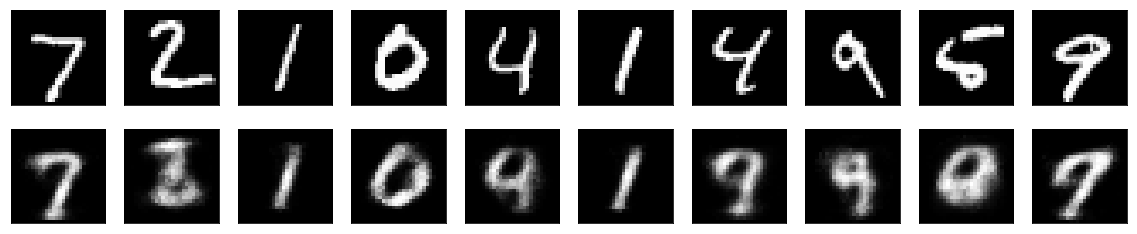

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
n=10
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    xtest=x_test[i].reshape(28,28)
    plt.imshow(xtest)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
    ax1=plt.subplot(2, n, n+i+1)    
    img=dec_imgs[i].reshape(28,28)
    plt.imshow(img)    
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)    
plt.show()

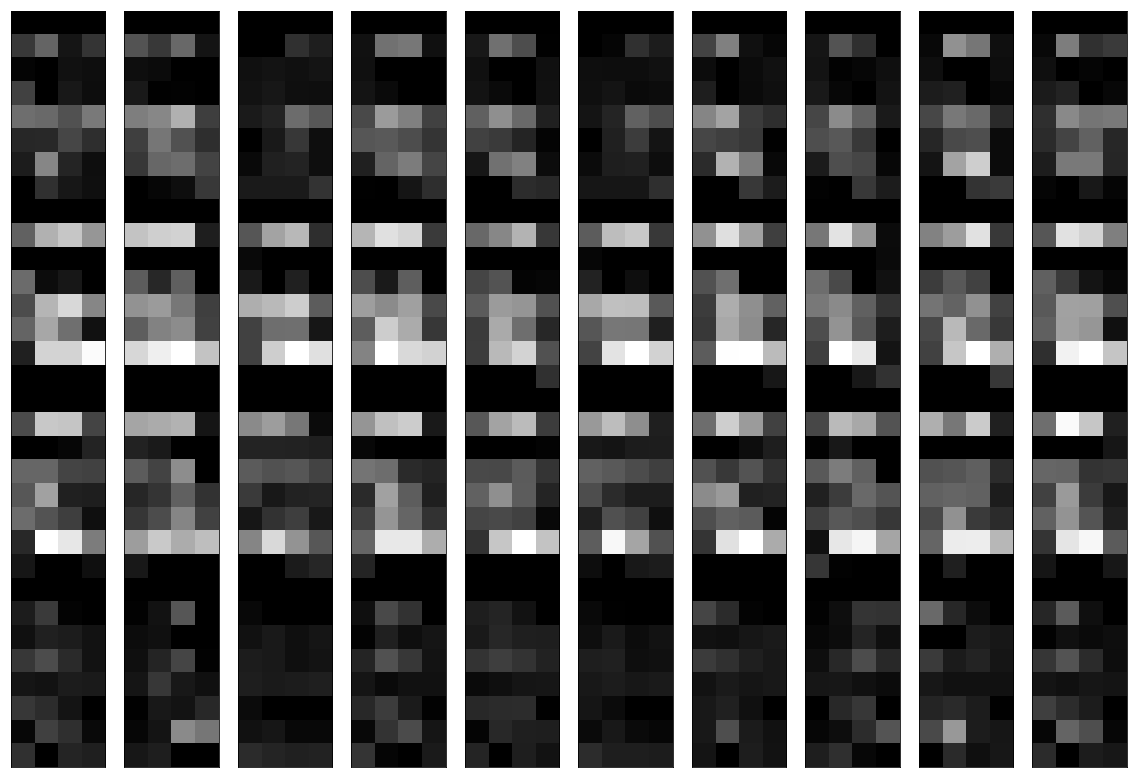

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, ))
n=10
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    xtest=enc_imgs[i].reshape(4,32)
    plt.imshow(xtest.T)
    plt.gray()
    ax.get_xaxis().set_visible(False)    
    ax.get_yaxis().set_visible(False)        
#    ax1=plt.subplot(2, n, n+i+1)    
#    img=dec_imgs[i].reshape(28,28)
#    plt.imshow(img)    
#    plt.gray()
#    ax1.get_xaxis().set_visible(False)
#    ax1.get_yaxis().set_visible(False)    
plt.show()